In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generate synthetic data
X = np.arange(-20, 20, 0.1)
np.random.shuffle(X)

eps = np.random.rand(400)*10
y = 23*X + 43 + eps

In [ ]:
X = X.reshape(-1, 1)

In [ ]:
X.shape

(400, 1)

In [ ]:
y.shape

(400,)

In [ ]:
y[:10]

array([ 100.92209108,  501.21879719, -197.90313652,  149.194875  ,
         74.09583382,  426.6715084 ,  378.25062224,  306.52105398,
       -127.16836093, -115.31180435])

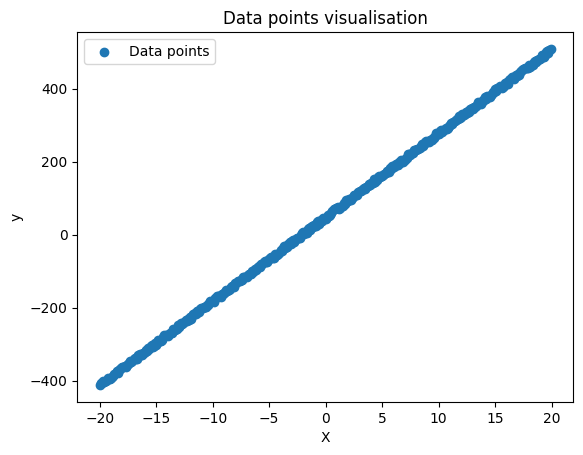

In [ ]:
# Plot the regression line
plt.scatter(X, y, label='Data points')
plt.title('Data points visualisation')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
def intial_weights(features):
  const_term = random.random()
  weights = np.random.rand(features)
  return const_term, weights

In [ ]:
def predict_Y(const_term , weights, X):
  return const_term + np.dot(X,weights)

In [ ]:
def calculate_cost(Y, Y_pred):
  residual_Y = Y - Y_pred
  n = len(Y-residual_Y)
  return np.sum( np.dot(residual_Y.T,residual_Y))/n

In [ ]:
def update_weights(x, y, y_pred, const_old, weights_old, learning_rate):

  d_const = (np.sum(y_pred-y)*2)/len(y)               # derivative term for const
  d_weights = (np.dot((y_pred-y),x)*2)/len(y)         # derivative term for weights

  weights_new = weights_old - learning_rate*d_weights   # updating new weights
  const_new = const_old - learning_rate*d_const      # updating const term

  return const_new, weights_new

In [ ]:
def gradient_descent(X, Y, learning_rate, iterations):

  const, weights = intial_weights(X.shape[1])

  for i in range(iterations):

    Y_pred = predict_Y(const, weights, X)
    this_cost = calculate_cost(Y, Y_pred)
    prev_const = const
    prev_weights = weights
    const, weights = update_weights(X, Y, Y_pred, prev_const, prev_weights, learning_rate)


  return const, weights

In [ ]:
b , w = gradient_descent(X, y, 0.007, 280)

In [ ]:
w[0], b

(23.00089380775353, 47.090689858773125)

Final weight (w): 23.0009
Final bias (b): 47.0907



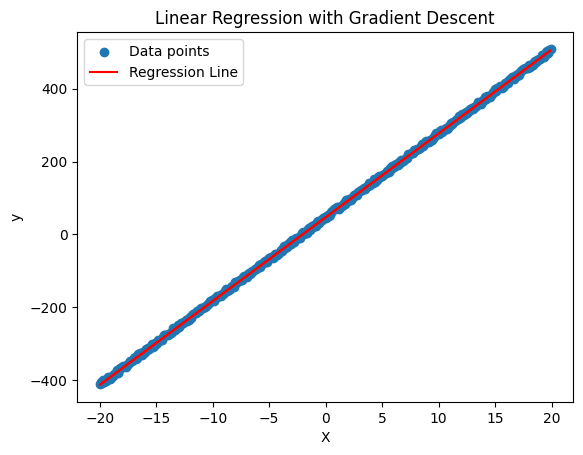

In [ ]:
# Print final weights and bias
print(f'Final weight (w): {w[0]:.4f}')
print(f'Final bias (b): {b:.4f}')

print()

# Plot the regression line
plt.scatter(X, y, label='Data points')
plt.plot(X, w * X + b, color='red', label='Regression Line')
plt.title('Linear Regression with Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()